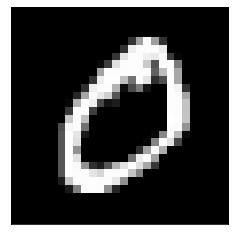

In [1]:
from keras.datasets import mnist
import cv2
from matplotlib import pyplot as plt

# Load the data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Show the first image in Jupiter notebook
plt.imshow(cv2.cvtColor(train_images[1], cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.show()

In [2]:
# Show the first image in the training data in a new window
cv2.imshow('image', train_images[1])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
# Normalize data
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [4]:
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
from keras import models
from keras import layers


# Define the model type
model = models.Sequential()
# Add hidden layer and define the input shape
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
# Add output layer
model.add(layers.Dense(10, activation='softmax'))

In [6]:
# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 8s 15ms/step - loss: 0.2550 - accuracy: 0.9266
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 0.1053 - accuracy: 0.9684
Epoch 3/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0693 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0504 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0379 - accuracy: 0.9890


In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.0665 - accuracy: 0.9799


In [8]:
# Save the model
model.save('mnist_ann.h5')

Answer:  5


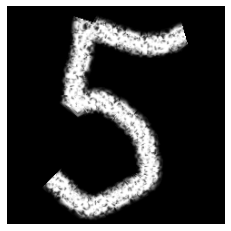

In [10]:
tst = 255 - cv2.imread('test.png', 0)
plt.axis('off')
plt.imshow(tst, cmap='gray')
tst = cv2.resize(tst, (28, 28)) # color inverse
tst = tst.reshape((1, 28 * 28))
tst = tst.astype('float32') / 255
pred = list(model.predict(tst)[0])
print('Answer: ', pred.index(max(pred)))